In [1]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_Basic, RPS_Basic_Multirun  # Importing RPS_Basic class from rps_base.py
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting, spacing_effect 
#from rps_simulation.practice_rate import simple_linear_rate 
#from rps_simulation.waiting_times import exponential_waiting_time 
#from rps_simulation.dynamical_models import logistic_model, general_model
#from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

## 1. Concave (Exp) Learning Curve

In [59]:
# Hyperparameters - spacing effect
ϵ = 2
s_spacing = 0.5 
beta_min = 0

n_iti = 101 # number of different values of waiting times
n_ret_int = 4 # number of retention interval

# Independent variables:
iti = np.linspace(0,5, n_iti) # inter-trial interval/ waiting time
#ret_int = np.linspace(5, 10, n_ret_int) # retention intervals
ret_int = [5, 10, 15, 20] # retention intervals

# initial conditions;
beta0 = 0.05 # starting forgetting rate
s0 = 0.8 # starting skill

# learning conditions:
exp_update = exponential_learning(alpha=0.002, skill_max=1)

# Data arrays be filled after calculations:
beta1 = np.zeros((n_ret_int, n_iti)) # beta after first trial:
beta2 = np.zeros((n_ret_int, n_iti)) # final beta
s1 = np.zeros((n_ret_int, n_iti))
s2 = np.zeros((n_ret_int, n_iti))

In [60]:

for i in range(n_ret_int): # loop over all retention intervals
    for j in range(n_iti): # loop over all inter-trial intervals
        s1_bef = exponential_forgetting(forgetting_rate=beta0).calculate(s0, iti[j]) # skill just before trial 1
        s1_tmp = exp_update.updated_skill(s1_bef) # skill after trial 1
        s1[i,j] = s1_tmp
    
        # calculate forgetting rate after trial 1:
        β1 = spacing_effect(beta_min=0.01, beta_max=beta0, e=ϵ, s=s_spacing).calc_forgetting_rate([iti[j]])
        beta1[i,j]=β1
    
        # Calculate final skill:
        s2_bef = exponential_forgetting(forgetting_rate=β1).calculate(s1_tmp, ret_int[i])
        s2_tmp = exp_update.updated_skill(s2_bef) # final skill after retention interval
        s2[i,j] = s2_tmp
    
        # calculate final forgetting:
        Δt_list = [iti[j], ret_int[i]] # list of wait times
        β2 = spacing_effect(beta_min=0.01, beta_max=β1, e=ϵ, s=s_spacing).calc_forgetting_rate(Δt_list)
        beta2[i,j]=β1
    
    

## Plotting:

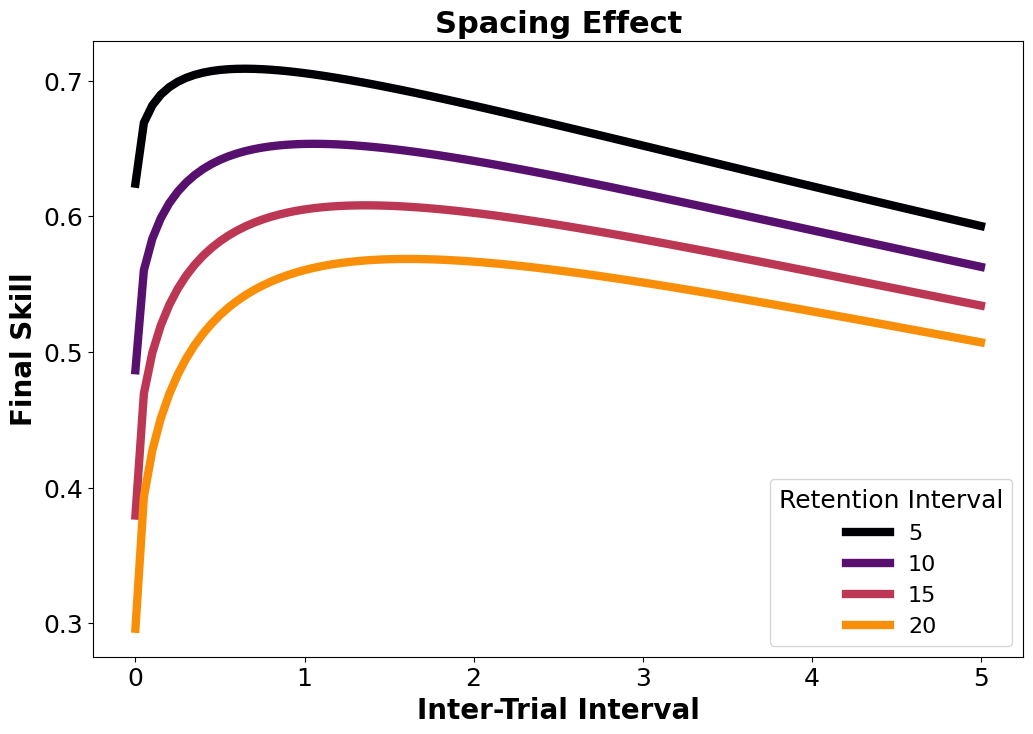

In [61]:
# Create a colormap
cm = plt.get_cmap('inferno')  # Can choose other colormaps like 'plasma', 'inferno', 'magma', 'cividis'

plt.figure(figsize=(12,8))
for i in range(n_ret_int): # looping over different retention intervals
    #plt.plot(iti, s2[i,:], lw=6, color='Black')
    plt.plot(iti, s2[i, :], lw=6, color=cm(i / n_ret_int), label = str(ret_int[i]))
plt.title('Spacing Effect', fontsize=22, weight='heavy')
plt.xlabel('Inter-Trial Interval', fontsize=20, weight='heavy')
plt.ylabel('Final Skill', fontsize=20, weight='heavy')

# Adding a legend with a title
plt.legend(title='Retention Interval', fontsize=16, title_fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../plots/spacing_effect_RT.png', dpi=512)
plt.show()